# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [57]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14 , 7)
import math
import scipy
from scipy import stats
from sklearn.metrics import mutual_info_score

In [3]:
df = pd.read_csv('./data/bank-full_2016.csv')

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [4]:
display(df.shape)

(45211, 17)

In [5]:
display(df.columns)

Index(['age', 'job', 'marital', 'education', 'default_credit', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'days_from_last_contact', 'previous_campaign_contacts',
       'previous_campaign_outcome', 'outcome'],
      dtype='object')

In [6]:
display(df["outcome"].value_counts())

no     39922
yes     5289
Name: outcome, dtype: int64

3) What is the data type of each attribute in the table?

In [7]:
display(df.dtypes)

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [8]:
df["isContactKnown"] = df["contact"].apply(lambda c: c != 'unknown')

2) Change the type of the 'campaign' attribute to Categorical data.

In [9]:
df["campaign"] = df["campaign"].astype("category")

## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [10]:
display(df.describe())

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

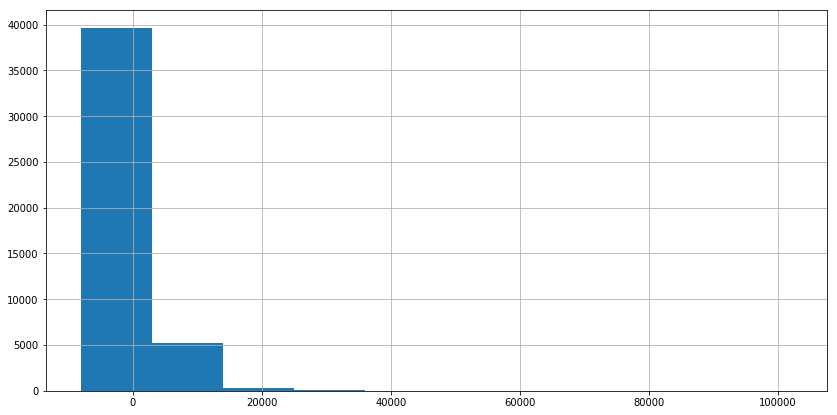

In [11]:
df["balance"].hist()

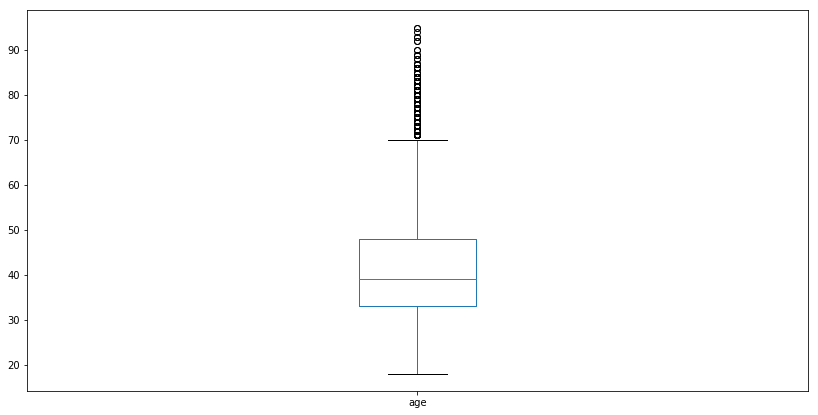

In [12]:
df["age"].plot.box()

3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

In [13]:
df["outcome"].value_counts()

no     39922
yes     5289
Name: outcome, dtype: int64

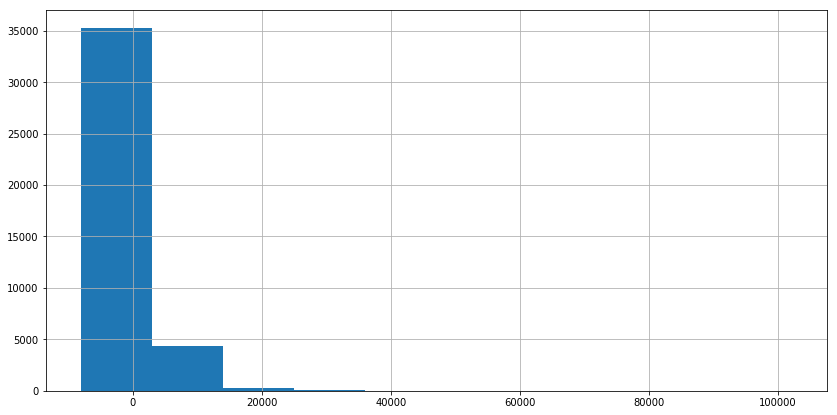

In [14]:
df[df["outcome"] == 'no']["balance"].hist()

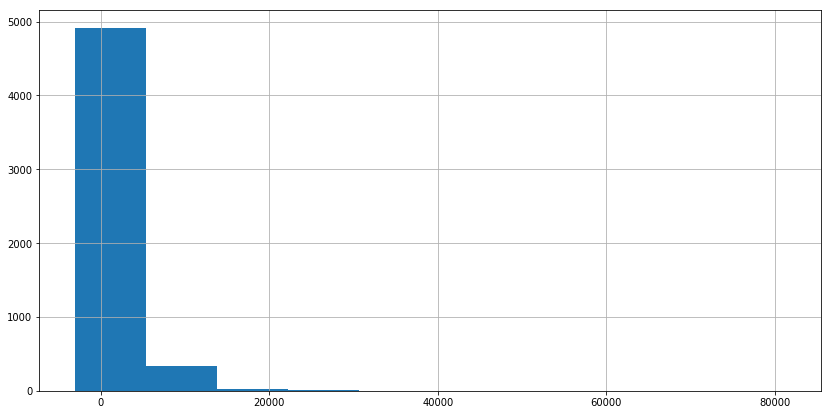

In [15]:
df[df["outcome"] == 'yes']["balance"].hist()

Answer: The distributions are quite similar. There much less people with a positive outcome, but the negative outcomes have a higher maximum of balance accounts.

# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [17]:
display(df.isnull().any())

age                           False
job                           False
marital                       False
education                     False
default_credit                False
balance                       False
housing_loan                  False
personal_loan                 False
contact                       False
day                           False
month                         False
duration                      False
campaign                      False
days_from_last_contact         True
previous_campaign_contacts    False
previous_campaign_outcome     False
outcome                       False
isContactKnown                False
dtype: bool

In [18]:
display(df.isnull().any().sum())

1

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [67]:
df2 = df[~df["contact"].isin(['cellular', 'telephone'])]

3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [75]:
display(df[df['days_from_last_contact'].isnull()])

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,NaN,0,unknown,no,False
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,NaN,0,unknown,no,False
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,NaN,0,unknown,no,False
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,NaN,0,unknown,no,False
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,NaN,0,unknown,no,False


In [86]:
display(len(df[(df['days_from_last_contact'].isnull()) & ( (df["previous_campaign_contacts"] != 0) | (df["previous_campaign_outcome"] != 'unknown'))]))

0

**Answer:**  It just means that this is the first time a contact had been contacted, it can be supported by columns "previous_campaign_contacts" and "previous_campaign_outcome". The last line of code shows that there aren't any days_from_last_contact which are NaN and doesn't have 0 in previous_campaign_contacts OR doesn't have 'unknown' in their previous_campaign_outcome, since it's their first campaign.

## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

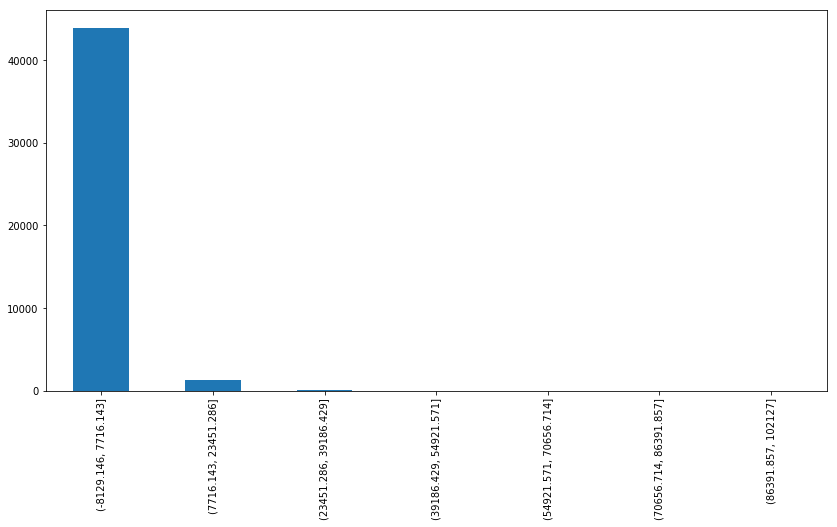

In [37]:
pd.cut(df["balance"], 7).value_counts().plot.bar()

2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

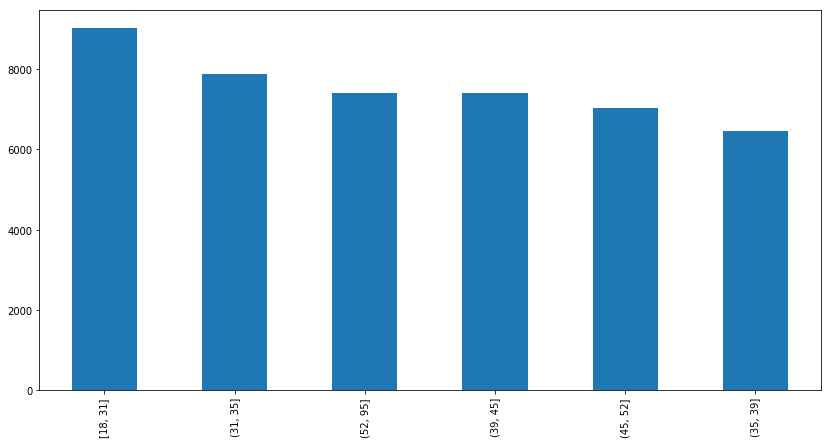

In [35]:
pd.qcut(df['age'], 6).value_counts().plot.bar()

3) Propose a way to further discretize the Month column.

**Answer:** We can discretize further as year quarters:

In [116]:
df['quarter'] = pd.to_datetime(df['month'].values, format='%b').astype('period[Q]')

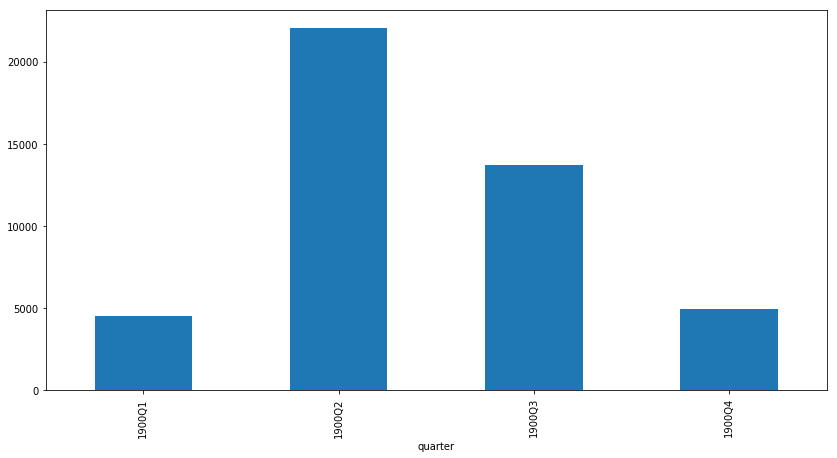

In [122]:
df.groupby('quarter')['quarter'].count().plot.bar()

# Q3

## Correlation

1) Calculate the pearson and spearman correlation between age and balance.

In [123]:
df[['age', 'balance']].corr(method='pearson')

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [124]:
df[['age', 'balance']].corr(method='spearman')

,age,balance
age,1.00000,0.09638
balance,0.09638,1.00000


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [125]:
df.corr(method='pearson')

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts,isContactKnown
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288,0.020132
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674,0.037331
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710,0.034103
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203,0.014379
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885,-0.162032
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000,0.154162
isContactKnown,0.020132,0.037331,0.034103,0.014379,-0.162032,0.154162,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [56]:
e = []
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        e.append({'Column': col, 'Entropy': stats.entropy(df[col])})
display(pd.DataFrame(e))

,Column,Entropy
0,age,10.686432
1,balance,-inf
2,day,10.566567
3,duration,10.356132
4,days_from_last_contact,-inf
5,previous_campaign_contacts,8.617959


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [64]:
max_mi_col = None
max_mi = -1
for col in df.columns:
    cur_mi = mutual_info_score(df['outcome'], df[col])
    if max_mi < cur_mi:
        max_mi = cur_mi
        max_mi_col = col
print(col + ': ' + str(max_mi))

isContactKnown: 0.360874063124


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

**Answer:** It seems that there are many outliers, and that **90%** of the data points are between 1 and 5

In [149]:
df['campaign'].value_counts().head(5)

1    17544
2    12505
3     5521
4     3522
5     1764
Name: campaign, dtype: int64

In [147]:
df['campaign'].value_counts().head(5).sum() / df['campaign'].count()

0.90367388467408372

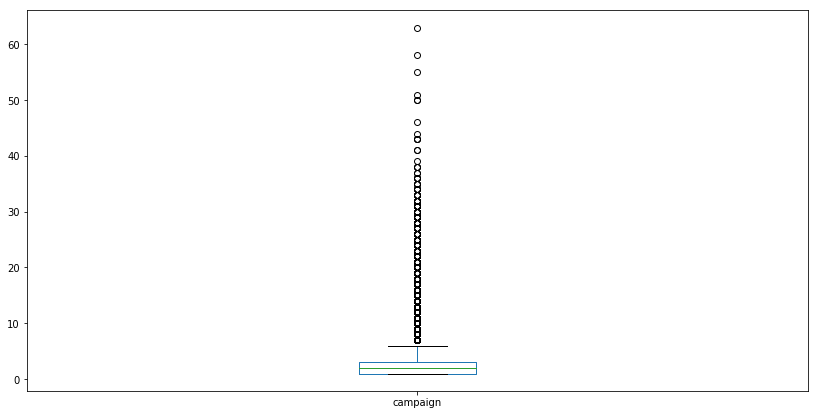

In [140]:
df['campaign'].astype('int').plot.box()

## Normalization

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

**Answer**: Feature scaling normalization makes sense since we do not know much about the distribution of the days from last contact so we prefer keeping the same proportions in the data set, just in a smaller scale.

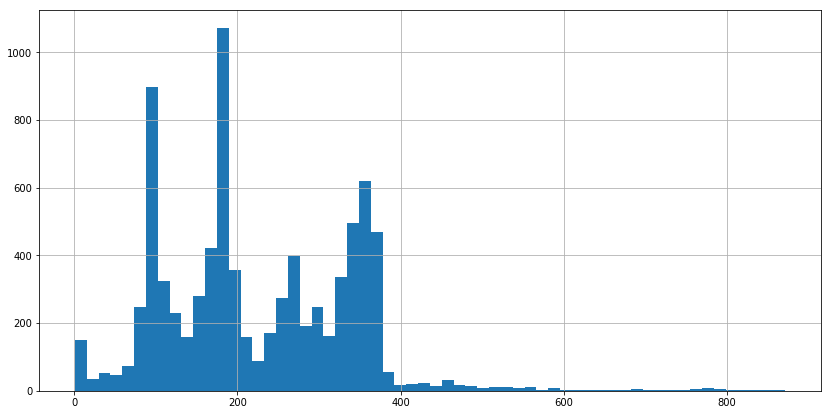

In [170]:
df['days_from_last_contact'].hist(bins=60)

In [155]:
df['days_from_last_contact'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: days_from_last_contact, dtype: float64

In [157]:
cur_min = df['days_from_last_contact'].min()
cur_max = df['days_from_last_contact'].max()

In [176]:
df['days_from_last_contact_normalized'] = (df['days_from_last_contact'] - cur_min) / (cur_max - cur_min)